<a href="https://colab.research.google.com/github/tompoles/Portfolio/blob/project_3/Edinbourgh_bikes_engeto_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
!pip install pymysql
conn_string = "mysql+pymysql://student:p7@vw7MCatmnKjy7@data.engeto.com/data"
alchemy_conn = sqlalchemy.create_engine(conn_string)
query = """select * from edinburgh_bikes"""
edinburgh_bikes_df = pd.read_sql(query, alchemy_conn)

*   Identifikujte aktivní a neaktivní stanice











In [225]:
edinburgh_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340986 entries, 0 to 340985
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      340986 non-null  int64         
 1   started_at                 340986 non-null  datetime64[ns]
 2   ended_at                   340986 non-null  datetime64[ns]
 3   duration                   340986 non-null  int64         
 4   start_station_id           340986 non-null  int64         
 5   start_station_name         340986 non-null  object        
 6   start_station_description  338612 non-null  object        
 7   start_station_latitude     340986 non-null  float64       
 8   start_station_longitude    340986 non-null  float64       
 9   end_station_id             340986 non-null  int64         
 10  end_station_name           340986 non-null  object        
 11  end_station_description    338426 non-null  object  

In [226]:
# pocet pouziti kazde jedne stanice
df1 = edinburgh_bikes_df.groupby('start_station_name', as_index=False).agg({'index':['count']})
df2 = edinburgh_bikes_df.groupby('end_station_name', as_index=False).agg({'index':'count'})

In [227]:
# udelat deskriptivni statistiku co bude pod 25 je nevyuzite, na 75 hodne vyuzite
df1.describe(), df2.describe()

(              index
               count
 count    169.000000
 mean    2017.668639
 std     2437.570833
 min        1.000000
 25%      174.000000
 50%     1110.000000
 75%     2938.000000
 max    12715.000000,               index
 count    170.000000
 mean    2005.800000
 std     2433.938281
 min        1.000000
 25%      161.750000
 50%     1124.500000
 75%     2960.000000
 max    11479.000000)

In [228]:
# vyfiltrovani vyuzitych a nevyuzitych stanic
  # filtr startovacich stanic na zaklade 25%+ vyuzitelnosti
df1['usability'] = np.where(df1['index'] > df1['index'].quantile(.25), 'usefull','expendable')
  # filtr konecnych stanic na zaklade 25%+ vyuzitelnosti
df2['usability'] = np.where(df2['index'] > df2['index'].quantile(.25), 'usefull','expendable')
# vysledny seznam stanic
df1[df1['usability'] == 'usefull']

,start_station_name,index,usability
,,count,
0,Abbeyhill,3360,usefull
2,Balgreen Road,1779,usefull
3,Belford Road,810,usefull
4,Boroughmuir,2870,usefull
5,Borrowman Square,544,usefull
...,...,...,...
162,West Crosscauseway,3271,usefull
164,Wester Coates Terrace,1937,usefull
165,Western General,358,usefull


In [229]:
# # Determinovani nejmene frekventovanych stanic na zaklade 25% kvantilu.
Usa_df1 = df1[df1['usability'] == 'expendable'].iloc[:, :-1].sort_values([('index','count')], ascending=False).rename(columns=({'start_station_name':'Station name'}))
Usa_df1
Usa_df2 = df2[df2['usability'] == 'expendable'].iloc[:, :-1].rename(columns=({'end_station_name':'Station name'}))
Usa_df = Usa_df1.merge(Usa_df2, on='Station name').drop(columns=[('Station name','')]).rename(columns={'index':'End station usage', 
                                                                                                      ('index','count'):'Start station usage',
                                                                                                      "('Station name','')":"Station"})
Usa_df

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Station name,Start station usage,End station usage
0,Tesco Ferrymuir,169,151
1,Port Edgar Marina,140,148
2,Scotstoun House,117,111
3,Hillside Crescent 1,116,139
4,Henderson Row,86,91
5,Balgreen,80,101
6,Meadow Place 2,74,55
7,Whitehouse Road,61,85
8,HSBC UK Lets Ride - Meadows Event,55,50
9,St. John's Road 2,55,66


In [230]:
# # Determinovani frekventovanych stanic na zaklade 25% kvantilu. - uzitecne stanice
Usa_df12 = df1[df1['usability'] == 'usefull'].iloc[:, :-1].sort_values([('index','count')], ascending=False).rename(columns=({'start_station_name':'Station name'}))
Usa_df12
Usa_df22 = df2[df2['usability'] == 'usefull'].iloc[:, :-1].rename(columns=({'end_station_name':'Station name'}))
Usa_df2 = Usa_df12.merge(Usa_df22, on='Station name').drop(columns=[('Station name','')]).rename(columns={'index':'End station usage', 
                                                                                                      ('index','count'):'Start station usage',
                                                                                                      "('Station name','')":"Station"})
Usa_df2

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Station name,Start station usage,End station usage
0,Meadows East,12715,11371
1,Bristo Square,10999,6672
2,St Andrew Square,10372,6943
3,Meadow Place,8662,7120
4,Victoria Quay,8140,11479
...,...,...,...
119,Kings Buildings 4,249,195
120,Heriot Watt - Student Accommodation,215,190
121,Edinburgh Park Central,207,218
122,Pollock Halls Virtual,186,173



*   identifikujte nejfrekventovanější stanice






In [231]:
# Determinovani frekventovanych stanic na zaklade 75% kvantilu.
df1['frq'] = np.where(df1['index'] > df1['index'].quantile(.75), '+', 0)
df2['frq'] = np.where(df2['index'] > df2['index'].quantile(.75), '+', 0)

In [232]:
# uprava vysledne tabulky nejfrektovanejsich stanic
frq_df1 = df1.iloc[:, :-2][df1['frq'] == '+'].rename(columns={'start_station_name':'Station name'}).sort_values([('index','count')], ascending=False)
frq_df2 = df2.iloc[:, :-2][df2['frq'] == '+'].rename(columns={'end_station_name':'Station name'})
frq_df = frq_df1.merge(frq_df2, on='Station name').drop(columns=[('Station name','')]).rename(columns={'index':'End station usage', 
                                                                                                      ('index','count'):'Start station usage',
                                                                                                      "('Station name','')":"Station"})
frq_df

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Station name,Start station usage,End station usage
0,Meadows East,12715,11371
1,Bristo Square,10999,6672
2,St Andrew Square,10372,6943
3,Meadow Place,8662,7120
4,Victoria Quay,8140,11479
5,Portobello - Kings Road,8036,10091
6,Castle Street,7628,6029
7,Canonmills,7589,9482
8,Fountainbridge,7081,6160
9,Dundee Terrace,6910,7019




*   identifikujte stanice, na kterých se kola hromadí a stanice, kde potenciálně chybí




In [233]:
# Station diff, kde chybi/prebyvaji kola
Usa_df2['Station diff'] = Usa_df2['End station usage'] - Usa_df2['Start station usage']
Usa_df2.sort_values(by=['Station diff'])

,Station name,Start station usage,End station usage,Station diff
1,Bristo Square,10999,6672,-4327
2,St Andrew Square,10372,6943,-3429
10,Charlotte Square,6834,4248,-2586
22,City Chambers,4605,2223,-2382
19,Lauriston Place,5218,3014,-2204
...,...,...,...,...
7,Canonmills,7589,9482,1893
5,Portobello - Kings Road,8036,10091,2055
15,Duke Street,5617,7961,2344
12,Leith Walk,6554,9326,2772


In [234]:
Usa_df2.describe()

,Start station usage,End station usage,Station diff
count,124.000000,124.000000,124.000000
mean,2730.064516,2729.282258,-0.782258
std,2488.511034,2487.529406,995.060357
min,178.000000,173.000000,-4327.000000
25%,858.750000,877.500000,-182.500000
50%,2031.000000,2011.500000,25.000000
75%,3719.500000,3698.000000,305.500000
max,12715.000000,11479.000000,3339.000000


In [235]:
#  Vyber extremu z prebyvajicich/chybejicich kol
Usa_df2.describe()
USA = Usa_df2[(((Usa_df2['Station diff'] > 305.5) & (Usa_df2['Station diff'] < 3338))) | (((Usa_df2['Station diff'] > -4327) & (Usa_df2['Station diff'] < -182.5)))]  
USA = USA.sort_values(by=['Station diff'])

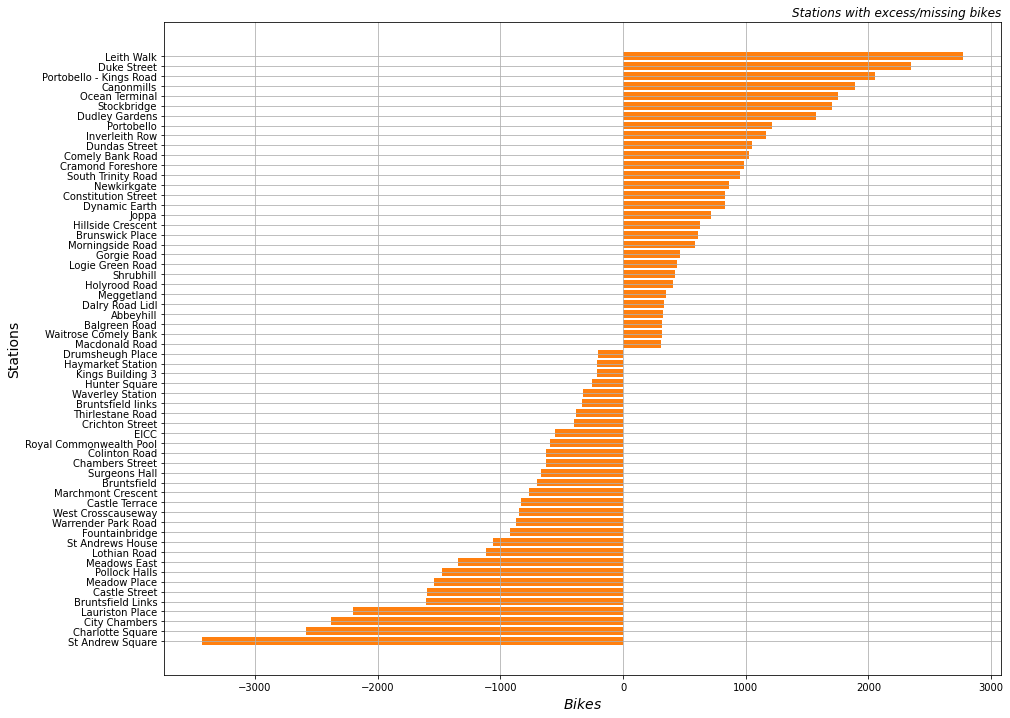

In [236]:
import matplotlib.pyplot as plt
# graf prebyvajicich/chybejicich kol
x = USA['Station name']
y = USA['Station diff']
plt.barh(x,y, )
fig_size = plt.rcParams["figure.figsize"]
plt.barh(x,y)
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.title('Stations with excess/missing bikes', x=1, loc='right', fontstyle='italic')
plt.xlabel('$Bikes$', fontsize=14)
plt.ylabel('Stations', fontsize=14)
plt.grid()
plt.show()

*   Spočítejte vzdálenosti mezi jednotlivými stanicemi




In [237]:
Dist_df = edinburgh_bikes_df[['start_station_name',	'start_station_latitude', 'start_station_longitude', 'end_station_name', 'end_station_latitude','end_station_longitude', 'duration']]
Dist_df.rename(columns={'start_station_name':'Start station',	'start_station_latitude':'SLat', 'start_station_longitude':'Slong', 'end_station_name':'End station', 'end_station_latitude':'Elat','end_station_longitude':'Elong'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [238]:
# Vyuziti funkce haversine na spocitani vzdalenosti na zaklade sirek a delek
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [239]:
# Uprava vysledneho DF
Dist_df['distance[km]'] = haversine_np(Dist_df['SLat'],Dist_df['Slong'],Dist_df['Elat'],Dist_df['Elong']).round(2)
Dist_df.drop(columns=['SLat','Slong',	'Elat',	'Elong'], inplace=True)
Dist_df['Duration[min]'] = (Dist_df['duration']/60).round(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [240]:
Dist_df.drop(columns='duration', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


*  Jak dlouho trvá jedna výpůjčka? Najděte odlehlé hodnoty



In [241]:
Dist_df

,Start station,End station,distance[km],Duration[min]
0,Charlotte Square,St Andrew Square,1.63,19.70
1,St Andrew Square,Canonmills,0.98,16.58
2,Canonmills,Victoria Quay,2.96,57.77
3,Kings Buildings 4,Kings Building 3,0.24,23.83
4,Kings Buildings 4,Kings Building 2,0.60,7.53
...,...,...,...,...
340981,Warrender Park Road,Warrender Park Road,0.00,11.08
340982,Chambers Street,Abbeyhill,2.04,6.20
340983,Hunter Square,Grassmarket,1.09,4.58
340984,Leith Walk,St Andrew Square,2.08,9.28


In [242]:
#  uprava dat pomnoci kvantilu
Q1 = Dist_df.quantile(0.25)
Q3 = Dist_df.quantile(0.75)
IQR = Q3-Q1

In [243]:
DF_IQR = Dist_df[~((Dist_df < (Q1-1.5 * IQR)) |(Dist_df > (Q3 + 1.5 * IQR))).any(axis=1)]
DF_IQR

,Start station,End station,distance[km],Duration[min]
0,Charlotte Square,St Andrew Square,1.63,19.70
1,St Andrew Square,Canonmills,0.98,16.58
2,Canonmills,Victoria Quay,2.96,57.77
3,Kings Buildings 4,Kings Building 3,0.24,23.83
4,Kings Buildings 4,Kings Building 2,0.60,7.53
...,...,...,...,...
340981,Warrender Park Road,Warrender Park Road,0.00,11.08
340982,Chambers Street,Abbeyhill,2.04,6.20
340983,Hunter Square,Grassmarket,1.09,4.58
340984,Leith Walk,St Andrew Square,2.08,9.28


In [244]:
# odstraneni nulovych hodnot jako chybovych
DF_IQR = DF_IQR[(DF_IQR != 0).all(1)]

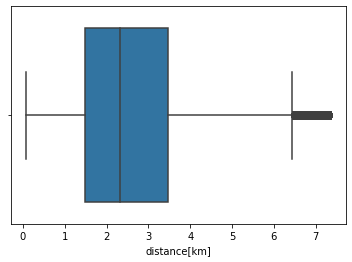

In [289]:
sns.boxplot(x=DF_IQR['distance[km]'])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

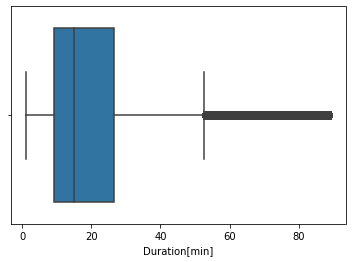

In [290]:
sns.boxplot(x=DF_IQR['Duration[min]'])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

Text(0.5, 0, 'Start station')

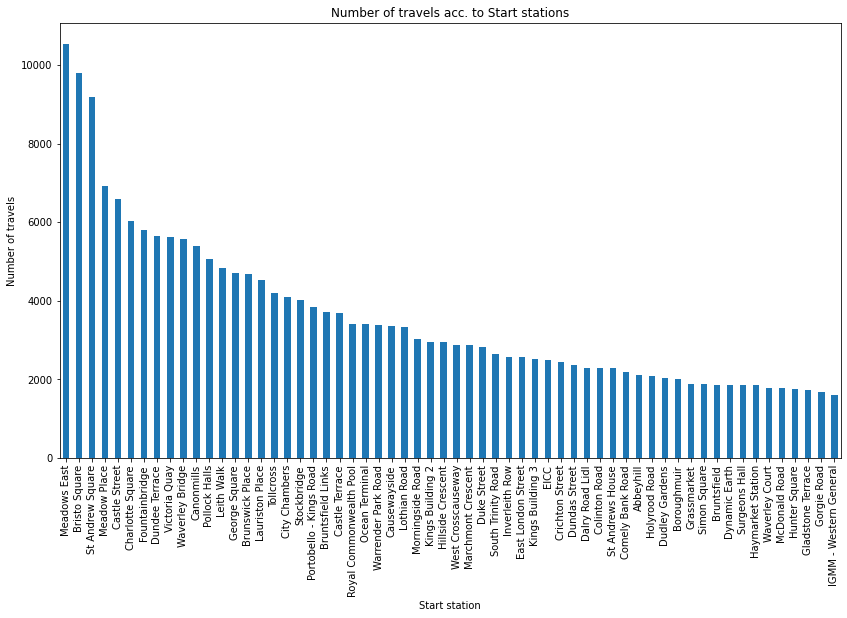

In [247]:
#  zobrazeni nejcasteji nastupujicich stanic
DF_IQR['Start station'].value_counts().nlargest(60).plot(kind='bar', figsize=(14,8))
plt.title('Number of travels acc. to Start stations')
plt.ylabel('Number of travels')
plt.xlabel('Start station')

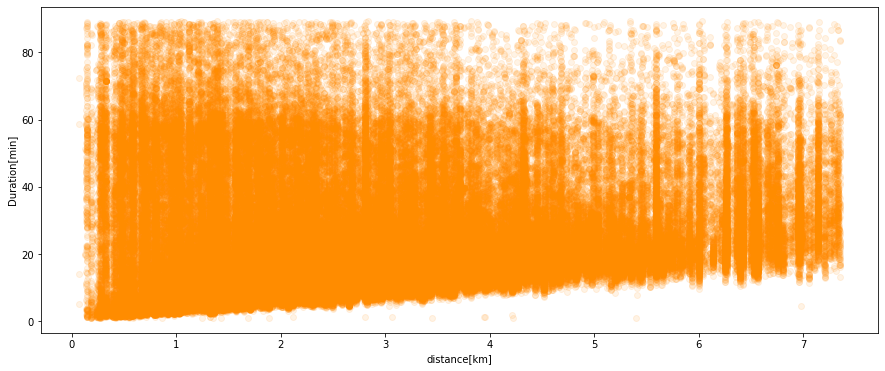

In [248]:
# Vynesení bodového grafu v zavislosti casu na vzdalenosti
fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(DF_IQR['distance[km]'], DF_IQR['Duration[min]'],color='darkorange', alpha=0.1)
ax.set_xlabel('distance[km]')
ax.set_ylabel('Duration[min]')
plt.show()

In [249]:
#  "expertni" uprava datasetu 
DF = Dist_df[(((Dist_df['distance[km]'] > 0) & (Dist_df['distance[km]'] < 280))) & (((Dist_df['Duration[min]'] > 1.02) & (Dist_df['Duration[min]'] < 500.05)))] 
DF

,Start station,End station,distance[km],Duration[min]
0,Charlotte Square,St Andrew Square,1.63,19.70
1,St Andrew Square,Canonmills,0.98,16.58
2,Canonmills,Victoria Quay,2.96,57.77
3,Kings Buildings 4,Kings Building 3,0.24,23.83
4,Kings Buildings 4,Kings Building 2,0.60,7.53
...,...,...,...,...
340980,Meadows East,Morningside Road,3.28,11.77
340982,Chambers Street,Abbeyhill,2.04,6.20
340983,Hunter Square,Grassmarket,1.09,4.58
340984,Leith Walk,St Andrew Square,2.08,9.28


*    Zobrazte histogram



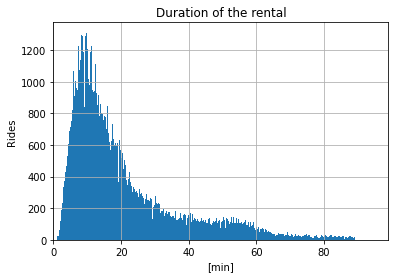

In [291]:
plt.hist(DF_IQR['Duration[min]'], bins=1000)
plt.xlim(0, 99,0.1)
plt.xlabel('[min]')
plt.ylabel('Rides')
plt.title('Duration of the rental')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.grid(True)
plt.show()

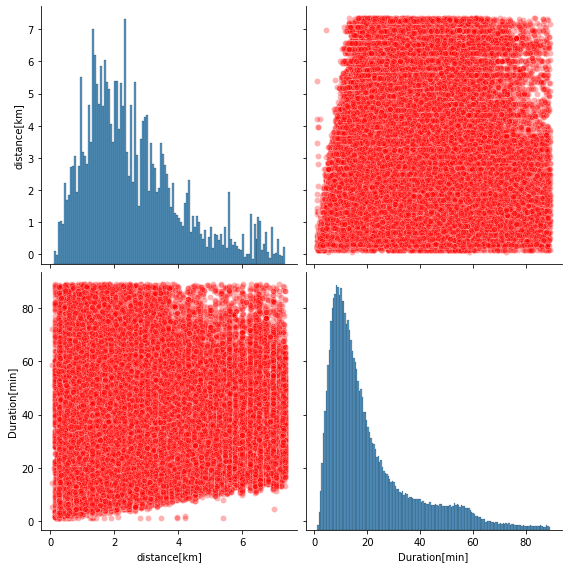

In [251]:
import seaborn as sns
sns.pairplot(DF_IQR,
             plot_kws={'facecolor': 'red',
                       'alpha': 0.3}, 
             height=4)
plt.show()

*   Zobrazte vývoj poptávky po půjčování kol v čase



In [252]:
# Nacteni dat
query = """select * from edinburgh_weather"""
edinburgh_weather_df = pd.read_sql(query, alchemy_conn)

In [253]:
edinburgh_weather_df.groupby('vis').describe()

time                     temp  ... pressure  date                        
          count unique    top freq count  ...     freq count unique         top freq
vis                                       ...                                       
Average       7      4  18:00    3     7  ...        2     7      5  2020-08-12    3
Excellent  5626      8  12:00  721  5626  ...      195  5626    791  2020-03-06    8
Good        324      8  18:00   50   324  ...       15   324    191  2019-08-11    7
Poor        379      8  03:00   72   379  ...       23   379    231  2020-03-27    8

[4 rows x 40 columns]

In [254]:
# vybrani a upraveni dat
ew_df1 = edinburgh_weather_df[['date', 'feels','rain', 'vis']]
ew_df2 = ew_df1.replace('\u00b0','', regex=True)
ew_df2 = ew_df2.replace('mm','', regex=True)

In [255]:
EW_DF = ew_df2.replace('c', '', regex=True)
EW_DF['feels'] = pd.to_numeric(EW_DF['feels'])
EW_DF['rain'] = pd.to_numeric(EW_DF['rain'])

In [256]:
# Podminkovani promenne 'vis' 
EW_DF.loc[EW_DF['vis'] == 'Exellent', 'W_condition'] = '0' 
EW_DF.loc[EW_DF['vis'] == 'Good', 'W_condition'] = '1'
EW_DF.loc[EW_DF['vis'] == 'Average', 'W_condition'] = '2' 
EW_DF.loc[EW_DF['vis'] == 'Poor', 'W_condition'] = '3'  
EW_DF['W_condition'] = EW_DF['W_condition'].astype('int')

In [257]:
EW_DF = EW_DF.groupby('date', as_index=False).agg({'feels':'mean', 'rain':'mean', 'W_condition':'mean'}).round(0)

In [258]:
EW_DF = EW_DF[(EW_DF['date'] >= '2018-09-15')]
EW_DF['date'] = EW_DF['date'].astype('datetime64')
EW_DF

,date,feels,rain,W_condition
14,2018-09-15,8.0,0.0,0.0
15,2018-09-16,11.0,0.0,0.0
16,2018-09-17,13.0,0.0,0.0
17,2018-09-18,14.0,0.0,0.0
18,2018-09-19,9.0,0.0,0.0
...,...,...,...,...
787,2020-10-27,5.0,0.0,0.0
788,2020-10-28,4.0,0.0,0.0
789,2020-10-29,5.0,1.0,1.0
790,2020-10-30,8.0,0.0,0.0


In [269]:
#  zmena datoveho typu
df_dem['date'] = df_dem['date'].astype('datetime64')

In [270]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 754
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        755 non-null    datetime64[ns]
 1   Rent count  755 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.7 KB


In [260]:
# Rozdeleni sloupce Start_at na "date" - datum a "time" - cas
from operator import attrgetter
fields = ['date', 'time']
df = edinburgh_bikes_df.join(pd.concat(attrgetter(*fields)(edinburgh_bikes_df['started_at'].dt), axis=1, keys=fields))
df.drop(columns=['started_at'], inplace=True)
DF_dem =df[['date', 'time','start_station_name', 'end_station_name', 'duration']]
df_dem = DF_dem .groupby('date', as_index=False).agg({'start_station_name':'count'}).rename(columns={'start_station_name':'Rent count'})

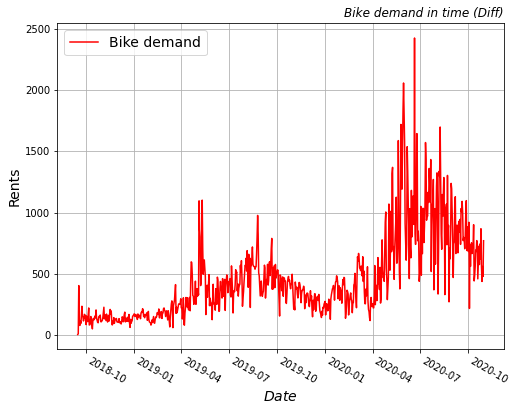

In [292]:
# graf vyuziti kol v case
x = df_dem['date']
y = df_dem['Rent count']
plt.plot(x,y, label='Bike demand', color='red')
# plt.plot(ew_df1, label='Bike demand', color='blue')
plt.title('Bike demand in time (Diff)', x=1, loc='right', fontstyle='italic')
plt.xlabel('$Date$', fontsize=14)
plt.ylabel('Rents', fontsize=14)
plt.xticks(rotation=-30, ha='left')
plt.legend(fontsize=14, ncol=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.grid()
plt.show()

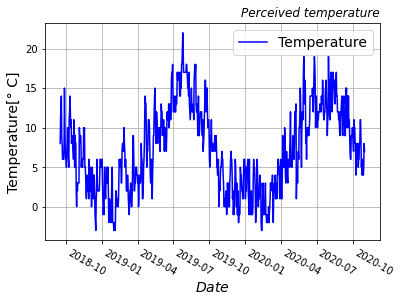

In [293]:
# graf pocitovych teplot v case
x = EW_DF['date']
y = EW_DF['feels']
plt.plot(x,y, label='Temperature', color='blue',)
plt.title('Perceived temperature', x=1, loc='right', fontstyle='italic')
plt.xlabel('$Date$', fontsize=14)
plt.ylabel('Temperature[\u00b0 C]', fontsize=14)
plt.xticks(rotation=-30, ha='left')
plt.legend(fontsize=14, ncol=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.grid()
plt.show()


*  identifikujte příčiny výkyvů poptávky



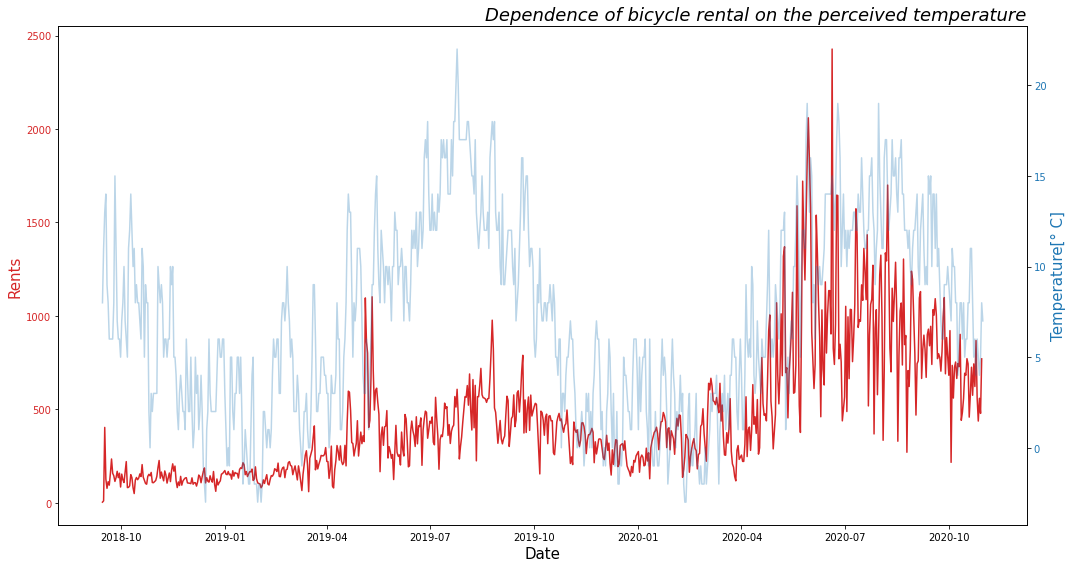

In [263]:
# Mozna zavislost vypujcovani kol na pocitove teplote
fig, ax1 = plt.subplots(figsize=(15,8))
x1 = EW_DF['date']
x2 = df_dem['date']
y1 = EW_DF['feels']
y2 = df_dem['Rent count']

plt.title('Dependence of bicycle rental on the perceived temperature', x=1, loc='right', fontstyle='italic', fontsize=18)
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Rents', color=color, fontsize=15)
ax1.plot(x2, y2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Temperature[\u00b0 C]', color=color, fontsize=15) 
ax2.plot(x1, y1, color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color) 
fig.tight_layout() 
plt.show()

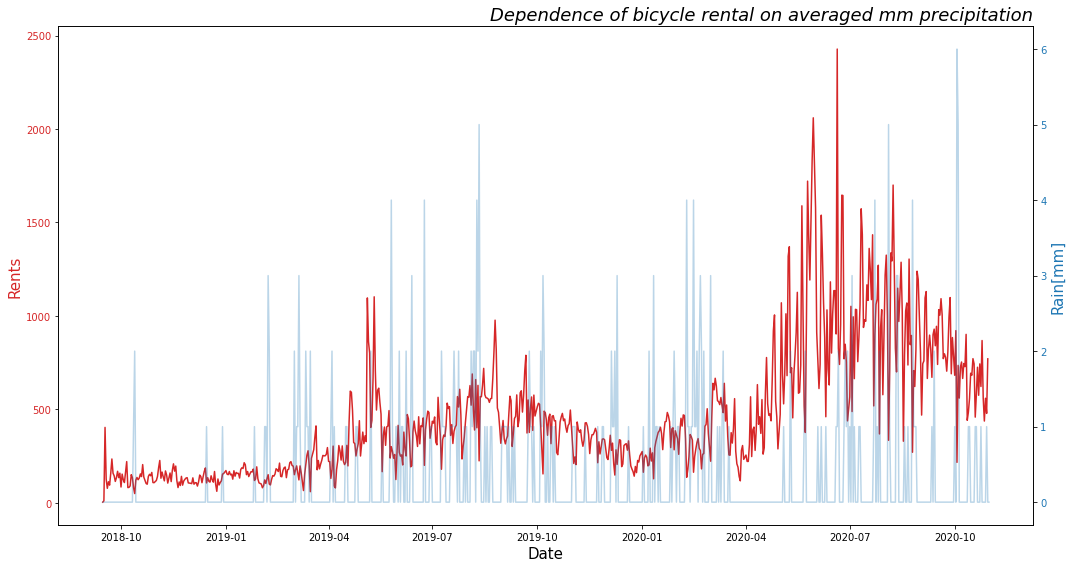

In [264]:
# Mozna zavislost vypujcovani kol na zprumerovane mm srazek
fig, ax1 = plt.subplots(figsize=(15,8))
x1 = EW_DF['date']
y1 = EW_DF['rain']
x2 = df_dem['date']
y2 = df_dem['Rent count']

plt.title('Dependence of bicycle rental on averaged mm precipitation', x=1, loc='right', fontstyle='italic', fontsize=18)
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Rents', color=color, fontsize=15)
ax1.plot(x2,y2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Rain[mm]', color=color, fontsize=15)  
ax2.plot(x1,y1, color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color) 
fig.tight_layout() 
plt.show()

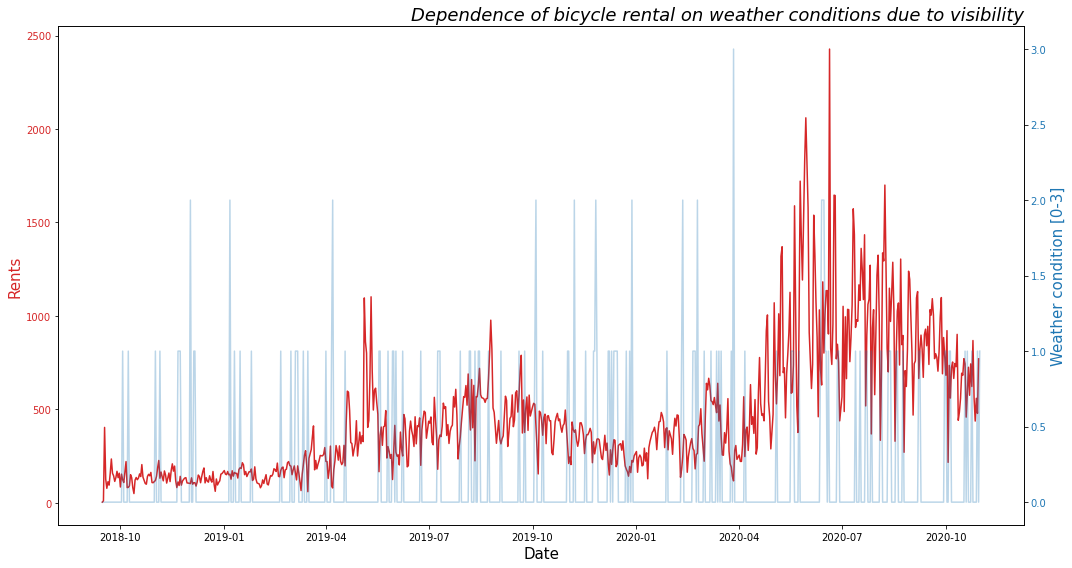

In [265]:
# Mozna zavislost vypujcovani kol na podminkach pocasi vzhledem k viditelnosti, pokud je W_condition = 0, tak jsou podminky excelentni

fig, ax1 = plt.subplots(figsize=(15,8))
x1 = EW_DF['date']
y1 = EW_DF['W_condition']
x2 = df_dem['date']
y2 = df_dem['Rent count']

plt.title('Dependence of bicycle rental on weather conditions due to visibility', x=1, loc='right', fontstyle='italic', fontsize=18)
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Rents', color=color, fontsize=15)
ax1.plot(x2,y2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Weather condition [0-3]', color=color, fontsize=15)  
ax2.plot(x1,y1, color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color) 
fig.tight_layout() 
plt.show()

In [271]:
DEMAND_corr = df_dem.merge(EW_DF, on='date')

,Rent count,feels,rain,W_condition
Rent count,1.000000,0.537463,-0.075945,-0.048374
feels,0.537463,1.000000,0.078311,0.019016
rain,-0.075945,0.078311,1.000000,0.246494
W_condition,-0.048374,0.019016,0.246494,1.000000


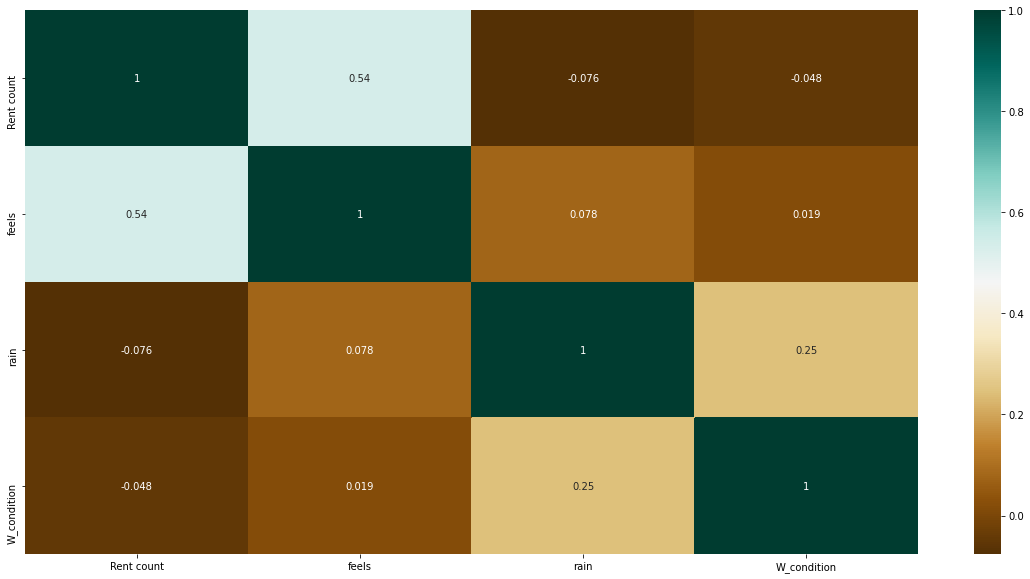

In [272]:
# Hledání vztahů mezi proměnnými.
plt.figure(figsize=(20,10))
c= DEMAND_corr.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

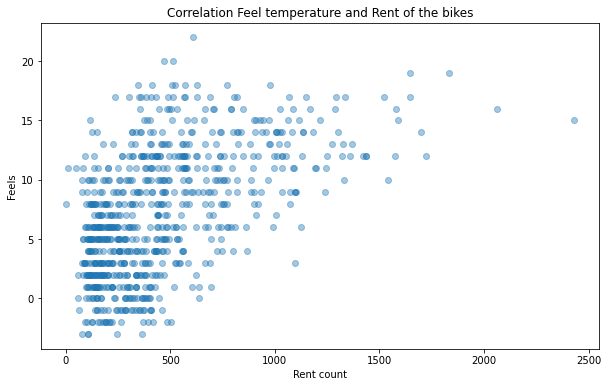

In [283]:
# Vynesení bodového grafu
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(DEMAND_corr['Rent count'], DEMAND_corr['feels'], alpha=0.4)
ax.set_title('Correlation on Feel temperature and Rent of the bikes')
ax.set_xlabel('Rent count')
ax.set_ylabel('Feels')
plt.show()

*   Půjčují si lidé kola více o víkendu než během pracovního týdne?




,Rent count
wkn,
0,437.0
1,488.0


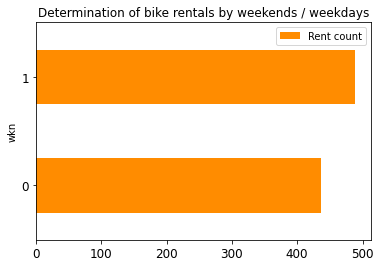

In [294]:
# urceni vikendu, kde vikend = 1, prac. den = 0
df_dem['wkn'] = ((pd.DatetimeIndex(df_dem.date).dayofweek) // 5 == 1).astype(int)
# Urceni pujcovani kol weekdays/weekends
index = ['weekend', 'weekday']
wkn_df = df_dem.groupby('wkn').mean().round(0)
x = wkn_df.plot.barh(stacked=True, color='darkorange', title='Determination of bike rentals by weekends / weekdays', fontsize=12, figsize=(6,4))
wkn_df